In [1]:
# from : https://www.kaggle.com/datasets/aqleemkhan/heart-disease-2020/data

# 개요

- 주어진 데이터를 통해 HeartDisease를 예측할 수 있는 머신러닝 모델을 교육시키고자 한다.

In [2]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리

## 데이터 확인

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_heart = pd.read_csv('../../data/heart_2020_cleaned.csv')
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
df_heart['SleepTime'].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

### Columns 설명

|항목|설명|Unique|분류|
|--|--|--|--|
|HeartDisease|관상동맥 심장 질환(CHD) 또는 심근경색(MI)을 앓은 적이 있다고 보고한 응답자|Yes,No|범주형 - 2분류|
|BMI|체질량 지수(BMI)||수치형|
|Smoking|평생 담배 100개비 이상을 피웠는지|Yes,No|범주형 - 2분류|
|AlcoholDrinking|성인 남성은 주 14잔 이상,여성은 주 7잔 이상 마시는 과음자|Yes,No|범주형 - 2분류|
|Stroke|뇌졸중을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalHealth|신체적 질병과 부상을 포함한 신체 건강에 대해 지난 30일 중 며칠 동안 신체 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|MentalHealth|정신 건강에 대해 지난 30일 중 며칠 동안 정신 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|DiffWalking|걷거나 계단을 오르는 데 심각한 어려움이 있는지|Yes,No|범주형 - 2분류|
|Sex|성별|Male,Female|범주형 - 2분류|
|AgeCategory|연령대|5년 단위 18 ~ 80 연령대 분류|범주형 - 14분류|
|Race|인종,민족 추정값|white,black,asian,american indian/alaskan native,hispanic,other|범주형 - 6분류|
|Diabetic|당뇨병을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalActivity|지난 30일 중 본업 외 신체 운동 여부|Yes,No|범주형 - 2분류|
|GenHealth|인지 건강상태|poor,fair,good,very good, excellent|범주형 - 5분류|
|SleepTime|평균 수면시간|1~24|범주형-24분류|
|Asthma|천식을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|KidneyDisease|결석, 방광염 또는 요실금을 제외한 신장 질환을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|SkinCancer|피부암을 앓은 적이 있는지|Yes,No|범주형 - 2분류|

### 결측치, 이상치 확인

#### 결측치

In [6]:
df_heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

- 해당 데이터에 결측치는 없는 것으로 확인

#### 이상치

- 수치형 데이터 기본 정보 확인

In [7]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


- PhysicalHealth,MentalHealth,SleepTime 항목은 숫자로 된 범주형으로 모든 항목이 범주내 값임을 확인
- SleepTime와 BMI의 경우 min값과 max값이 일반적인 수치와 매우 차이가 나기 때문에 이상치가 있을 것이라고 판단
- SleepTime은 수치로 된 범주형이므로 시각적 그래프와 describe를 통해 이상치 확인

##### SleepTime
- 성인의 일반적인 수면시간은 하루 7~8시간이므로 절반(4시간)과 두배 이상(16시간)의 범위를 넘어가는 데이터를 확인
- 확인하였을 때 그 수가 적다면 이상치로 적용
- 그래프로 이상값 확인

In [8]:
# 갯수 확인
print("16시간 이상 low 갯수 : ",df_heart.query('SleepTime >= 16').value_counts().sum())
print("4시간 이하 low 갯수 : ",df_heart.query('SleepTime <= 4').value_counts().sum())

16시간 이상 low 갯수 :  470
4시간 이하 low 갯수 :  11081


In [9]:
import scipy.stats as stats

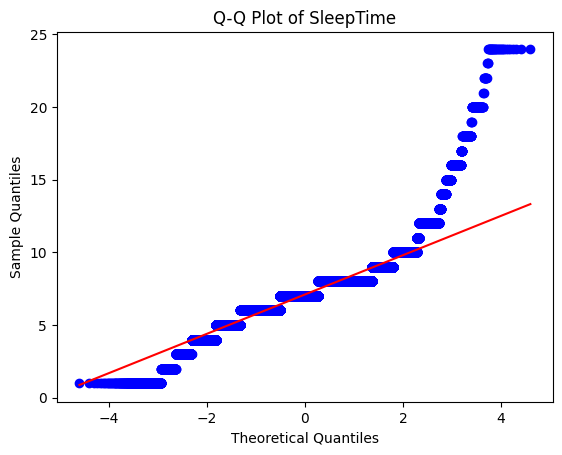

In [10]:
# Q-Q 플롯으로 4사분위에 대한 정규선 관계 시각적 확인
stats.probplot(df_heart['SleepTime'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SleepTime')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

- 4시간 이하에서 1시간으로 응답한 수가 매우 많은 것으로 보았을 때, 자신의 평균 수면시간을 과장하여서 대답한 것으로 판단
- 10시간 이상에서 선을 점점 크게 벗어남 -> 이상치의 그룹을 하나로 묶어서 계산, 그러나 선을 벗어나는 11시간 이상으로 할지 본디 예상했던 16시간 이상으로 할지 생각해봐야함
- 우선 선을 벗어나는 11시간 이상을 하나의 그룹으로 생각하고 묶어서 계산 시행후 결과를 확인

 따라서, 각 4시간,11시간을 벗어나는 그룹을 하나의 범주로 묶어서 적은 수면, 과다 수면으로 설정하고 각 경계 그룹에 편입 후 분석

In [11]:
df_heart['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [12]:
# 이상치 분석내용 적용 
df_heart['SleepTime'] = df_heart['SleepTime'].apply(lambda x: 4 if x <= 4 else (11 if x>=11 else x))

##### BMI
- 정규성에 따라 IQR or 3sigma를 사용하여 이상치 제거
- low 갯수가 5,000개 이상이므로 Anderson Test로 정규성 확인

In [13]:
stats.anderson(df_heart['BMI'])

AndersonResult(statistic=4439.45398043585, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=28.325398520927465, scale=6.356100200470739)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

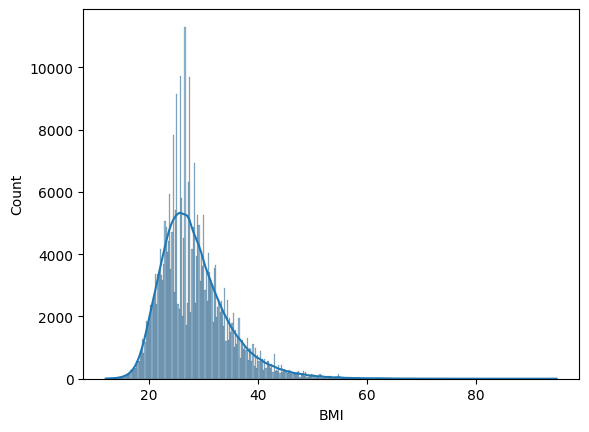

In [14]:
sns.histplot(data=df_heart,x='BMI',kde=True)
plt.show()

anderson test 결과
- statistic=4439.45398043585
- critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092])
모든 구간(15%~1%) 수준에서 검정통계량이 더 크므로 정규분포를 따르지 않는다고 판단
따라서 IQR 이상치 제거법으로 이상치 제거

In [15]:
# 이상치 제거 적용
import numpy as np

# 제 1 사분위수(Q1)와 제 3 사분위수(Q3) 계산
Q1 = np.percentile(df_heart['BMI'], 25)
Q3 = np.percentile(df_heart['BMI'], 75)

# IQR 계산
IQR = Q3 - Q1

# 이상치를 정의하는 임계값 설정
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
print("이상치 제거 전 low 갯수 : ",len(df_heart['BMI']))
# 이상치 제거
df_heart = df_heart.query(f'BMI >= {lower_threshold} & BMI <= {upper_threshold}')
print("이상치 제거 후 low 갯수 : ",len(df_heart['BMI']))

이상치 제거 전 low 갯수 :  319795
이상치 제거 후 low 갯수 :  309399


- 범주형 데이터 항목 확인

In [16]:
df_heart['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df_heart['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df_heart['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df_heart['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df_heart['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df_heart['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
df_heart['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [23]:
df_heart['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [24]:
df_heart['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [25]:
df_heart['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df_heart['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [27]:
df_heart['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df_heart['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df_heart['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

- Diabetic 항목에서 no와 yes에 대한 다른 unique항목이 있는것을 확인
- 임신성 당뇨와 경계성 당뇨
- 해당 항목의 갯수가 크지 않다면 대분류로 편입

In [62]:
df_heart['Diabetic'].value_counts()

Diabetic
No                         262880
Yes                         37701
No, borderline diabetes      6385
Yes (during pregnancy)       2433
Name: count, dtype: int64

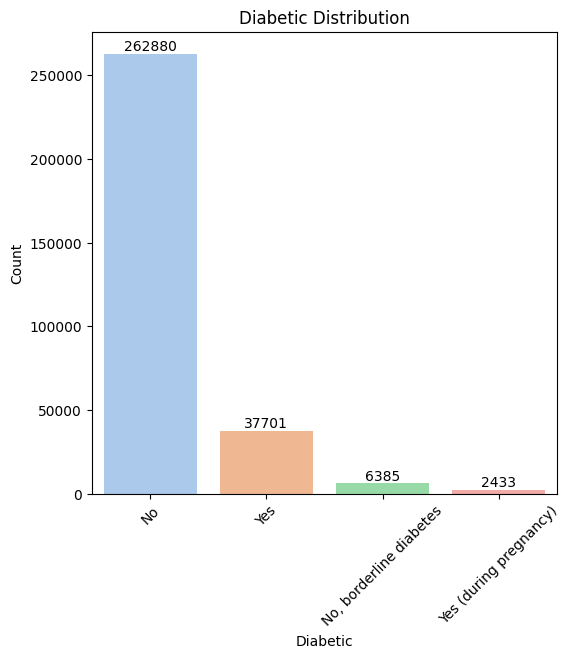

In [68]:
labels = df_heart['Diabetic'].value_counts().index
counts = df_heart['Diabetic'].value_counts().values


plt.figure(figsize=(6, 6))
sns.countplot(data=df_heart, x='Diabetic',order=labels, palette='pastel')

# 막대 위에 수치 표시
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

- 해당 갯수가 크지 않다고 판단, 각 상위 그룹에 편입진행
- 임신성 당뇨는 특수한 경우이므로 No그룹으로 편입
- 경계성 당뇨는 어느 정도 당뇨에 대한 진행이 이루어지고 있으므로 Yes그룹으로 편입

In [36]:
df_heart['Diabetic'] = df_heart['Diabetic'].apply(lambda x:'Yes' if x=='No, borderline diabetes' else ('No' if x=='Yes (during pregnancy)' else x))
df_heart['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
#### 라벨 인코딩 진행
data_column_list = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [38]:
for i in data_column_list:
    df_heart[i] = label_encoder.fit_transform(df_heart[i])
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,0,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0


# 지도학습 모델 선정
- target(HeartDisease)는 범주형 - 2분류 이다.

### train set과 test set 분리

In [39]:
target = df_heart['HeartDisease']
df_features = df_heart.copy()
features = df_features.drop(columns='HeartDisease')

In [40]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((216579, 17), (92820, 17), (216579,), (92820,))

## target의 샘플링 비율 확인

In [41]:
target_train.value_counts()

HeartDisease
0    198275
1     18304
Name: count, dtype: int64

- 1번그룹 (Yes 그룹)의 샘플링 갯수가 상대적으로 적은 것을 확인
- 1번그룹에 대해 oversampling 기법을 사용하여 비율 맞춤 작업 진행

In [42]:
from imblearn.over_sampling import SMOTE
overSampling = SMOTE(sampling_strategy=0.8)
feature_oversample, target_oversample =  overSampling.fit_resample(features_train,target_train)
feature_oversample.shape, target_oversample.shape

((356895, 17), (356895,))

In [43]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

In [44]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [45]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# # model = RandomForestClassifier()
# model = GradientBoostingClassifier()

In [46]:
# from sklearn.svm import SVC
# model = SVC()

In [47]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()

In [48]:
# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier()

In [49]:
# from xgboost import XGBClassifier
# model = XGBClassifier()

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [ ]:
model.fit(features_train,target_train)

[LightGBM] [Info] Number of positive: 18290, number of negative: 198289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 216579, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084450 -> initscore=-2.383371
[LightGBM] [Info] Start training from score -2.383371


LGBMClassifier()

# 모델 평가

In [ ]:
features_test_prdict = model.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test,features_test_prdict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.58      0.08      0.15      7900

    accuracy                           0.92     92820
   macro avg       0.75      0.54      0.55     92820
weighted avg       0.89      0.92      0.89     92820



DecisionTreeClassifier
```
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     84920
           1       0.23      0.25      0.24      7900

    accuracy                           0.87     92820
   macro avg       0.58      0.59      0.58     92820
weighted avg       0.87      0.87      0.87     92820
```

LogisticRegression
```
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.51      0.09      0.15      7900

    accuracy                           0.92     92820
   macro avg       0.71      0.54      0.55     92820
weighted avg       0.89      0.92      0.89     92820
```

RandomForestClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84920
           1       0.34      0.11      0.17      7900

    accuracy                           0.91     92820
   macro avg       0.63      0.55      0.56     92820
weighted avg       0.87      0.91      0.88     92820
```

GradientBoostingClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.56      0.09      0.16      7900

    accuracy                           0.92     92820
   macro avg       0.74      0.54      0.56     92820
weighted avg       0.89      0.92      0.89     92820
```

SVC
```
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     84920
           1       0.00      0.00      0.00      7900

    accuracy                           0.91     92820
   macro avg       0.46      0.50      0.48     92820
weighted avg       0.84      0.91      0.87     92820
```

GaussianNB
```
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     84920
           1       0.27      0.47      0.34      7900

    accuracy                           0.85     92820
   macro avg       0.61      0.68      0.63     92820
weighted avg       0.89      0.85      0.87     92820
```

KNeighborsClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84920
           1       0.31      0.08      0.12      7900

    accuracy                           0.91     92820
   macro avg       0.61      0.53      0.54     92820
weighted avg       0.87      0.91      0.88     92820
```

MLPClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.57      0.07      0.13      7900

    accuracy                           0.92     92820
   macro avg       0.74      0.53      0.54     92820
weighted avg       0.89      0.92      0.89     92820
```

XGBClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.51      0.10      0.17      7900

    accuracy                           0.92     92820
   macro avg       0.72      0.55      0.56     92820
weighted avg       0.89      0.92      0.89     92820
```

LGBMClassifier
```
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84920
           1       0.58      0.08      0.15      7900

    accuracy                           0.92     92820
   macro avg       0.75      0.54      0.55     92820
weighted avg       0.89      0.92      0.89     92820
```

# 모델 평가 결과
- 모든 classifier 모델에서 1번 항목의 score가 매우 낮게 측정되는 것을 확인
- 데이터의 분류가 충분히 될 수 있는 columns들의 unique값들이 바이너리해서 경우의 수가 매우 적어 발생한 것으로 예상됨
- 위의 데이터 전처리에서 그룹핑이 아닌 될 수 있는한 세분화를 진행하여 정확성을 높히는 것이 좋을 것으로 판단됨
- 모델 중에서는 초기 세팅의 score가 비교적 높은 GaussianNB 또는 DecisionTreeClassifier의 하이퍼파라미터를 조정하여 사용하는 것이 좋아보임(예측률과 재현률에 따라 조절)
- 다음 단계에서 데이터의 재처리와 두가지 모델을 가지고 모델의 정확성을 높히는 작업을 진행